# Desafío Empresarial: Análisis de Cohortes para los Pagos de Ironhack (Proyecto 1)

In [4]:
import numpy as np
import pandas as pd

## Cohortes de usuarios definidos por el mes de creación de su primer adelanto en efectivo

In [40]:
cash = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')

In [84]:
fees = pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

In [100]:
# Mostrar dataset cash request
#cash
#fees

# Check first rows
#cash.head()
#fees.head()

# Shape of the DataFrame (rows, columns)
#print(f"Shape of the DataFrame: {fees.shape}")

# Column names
#print(f"Column Names: {fees.columns}")

# Data types of each column
#print(f"Data Types:\n{fees.dtypes}")

# General Information about the DataFrame
#data_info = cash.info()
#data_info = fees.info()

# Statistical Summary
data_summary = cash.describe()
print("\nStatistical Summary:")
print(data_summary)

# Check for missing values in the DataFrame
#missing_values = fees.isnull(df)
#fees.isnull().sum()


Statistical Summary:
                 id        amount        user_id  deleted_account_id
count  23970.000000  23970.000000   21867.000000         2104.000000
mean   13910.966124     82.720818   32581.250789         9658.755228
std     7788.117214     26.528065   27618.565773         7972.743249
min        3.000000      1.000000      34.000000           91.000000
25%     7427.250000     50.000000   10804.000000         3767.000000
50%    14270.500000    100.000000   23773.000000         6121.500000
75%    20607.750000    100.000000   46965.000000        16345.000000
max    27010.000000    200.000000  103719.000000        30445.000000


In [86]:
# Column names
print(f"Column Names: {cash.columns}")
print(f"Column Names: {fees.columns}")

Column Names: Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')
Column Names: Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')


In [56]:
# Previo al cambio de cabeceras
#fees.head()

In [90]:
# Intercambiar nombre de las columnas 'id' y 'cash_request_id' en la tabla fees
fees = fees.rename(columns={'id': 'cash_request_id', 'cash_request_id': 'id'})

In [92]:
# Después del cambio de cabeceras
fees.head()

,cash_request_id,id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [76]:
# Cambiar tipo de datos de columna fees.id???
#fees_ok['id'] = fees_ok['id'].astype(int)
#cash['user_id'] = cash['user_id'].astype(int)
#cash['deleted_account_id'] = cash['deleted_account_id'].astype(int)
#cash.info()

# CONCLUSION: IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [78]:
cash.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [94]:
fees.isnull().sum()

cash_request_id        0
id                     4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

In [62]:
cash.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [64]:
fees_ok.head()

,cash_request_id,id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


## Análisis Exploratorio de Datos (EDA)

1\. **Vista Previa de Datos:** head(), tail() y sample()

2\. **Visión General de Datos:** info() y describe()

3\. **Valores Únicos:** unique() o value_counts()

4\. **Ordenamiento:** sort_values()

5\. **Subconjunto de Datos:** Usa corchetes ([]) para extraer columnas o filas basadas en condiciones.

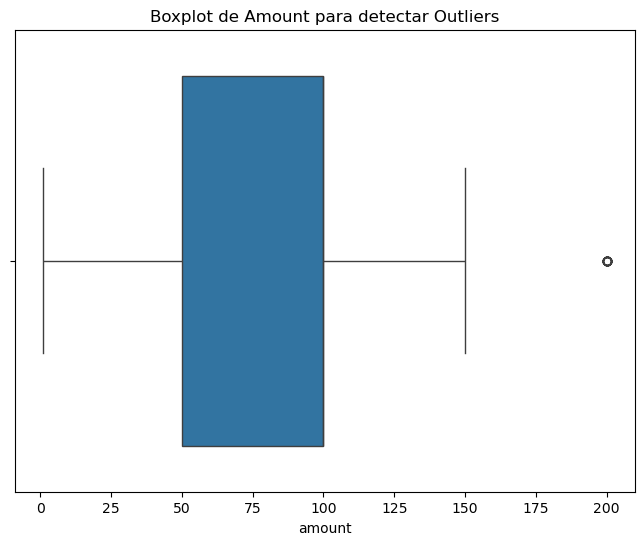

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para la columna 'amount', por ejemplo:
Q1 = cash['amount'].quantile(0.25)
Q3 = cash['amount'].quantile(0.75)
IQR = Q3 - Q1
# Definir el rango para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtrar los datos sin outliers
filtered_cash = cash[(cash['amount'] >= lower_bound) & (cash['amount'] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(x=cash['amount'])
plt.title('Boxplot de Amount para detectar Outliers')
plt.show()